# Retail Wallmart analysis

In [1]:
import pandas as pd
import numpy as np


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline 

In [31]:
from matplotlib import style

In [3]:
import seaborn as sns

In [4]:
from matplotlib import dates

In [5]:
from datetime import datetime

In [46]:
from scipy import stats

In [48]:
import scipy.stats as ss

In [6]:
A = '/Users/macbook/Desktop/DS/Projects_Py_DS/Wallmart_analysis/Walmart_Store_sales.csv'

In [7]:
df = pd.read_csv(A)

In [8]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [10]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [11]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# Analysis Tasks

In [12]:
#Which store has maximum sales
Max_sales = df.groupby('Store')['Weekly_Sales'].sum()

In [23]:
print("The store that has maximum sales is",Max_sales.idxmax(), "with",Max_sales.max(),"$")

The store that has maximum sales is 20 with 301397792.46000004 $


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

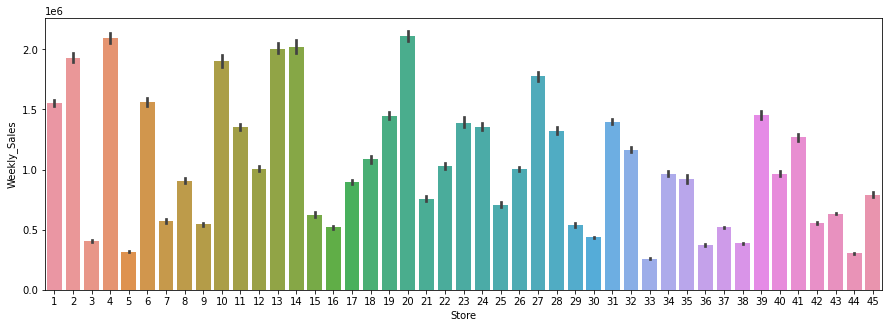

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Store, y = df.Weekly_Sales)

In [15]:
#Whcih store has maximum SD i.e., the sales vary a lot
max_std = df.groupby('Store')['Weekly_Sales'].std() 

In [16]:
print("Store with maximum standard deviation is", max_std.idxmax(), "with",max_std.max())

Store with maximum standard deviation is 14 with 317569.9494755081


In [17]:
#Coefficient of variation
max_cov = ((df.groupby('Store')['Weekly_Sales'].std()) / (df.groupby('Store')['Weekly_Sales'].mean()))*100 

In [18]:
print("Store with maximum coefficient of variation is", max_cov.idxmax(), "with variation",max_cov.max())

Store with maximum coefficient of variation is 35 with variation 22.968111389976446


In [19]:
#Which store has maximum quaterly growth rate in Q3'2012
df['Date'] = pd.to_datetime(df['Date']) #Changing to date time format
df['Year'] = pd.DatetimeIndex(df['Date']).year #Spliting year and month column
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19


In [20]:
Q3 = df[(df['Date'] > '2012-07-01') & (df['Date'] < '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

In [21]:
print("Store that has good quaterly growth rate is", Q3.idxmax(), 'with', Q3.max(),'$')

Store that has good quaterly growth rate is 4 with 25652119.35 $


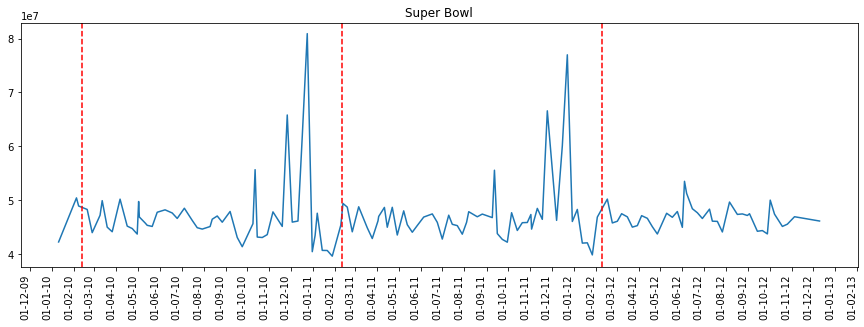

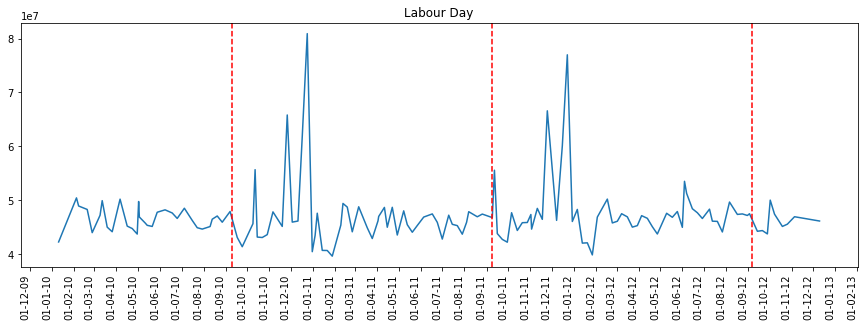

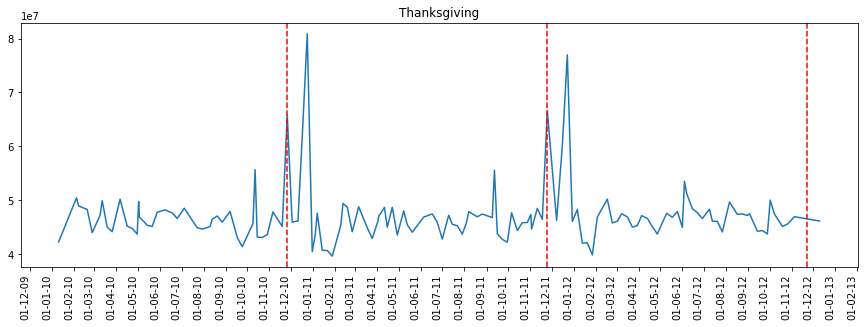

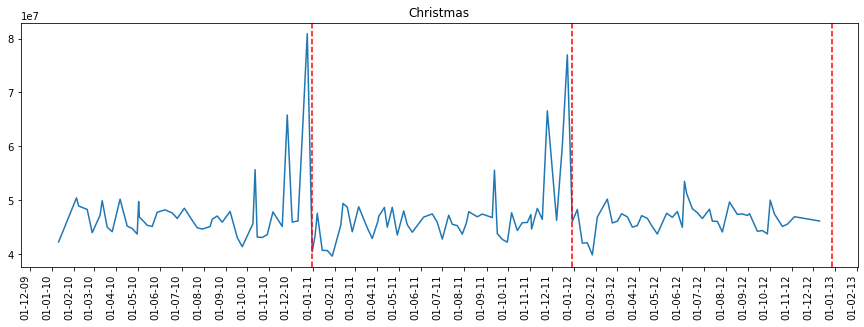

In [22]:
#Some holidays have negative impact on sales. 
#Find out holidays that have higher sales than the mean sales in non-holiday season for all together


def plot_line(df,holiday_dates,holiday_label):
    fig, ax = plt.subplots(figsize = (15,5))  
    ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label)
    
    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')
    

    plt.title(holiday_label)
    x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    xfmt = dates.DateFormatter('%d-%m-%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()


total_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']
    
plot_line(total_sales,Super_Bowl,'Super Bowl')
plot_line(total_sales,Labour_Day,'Labour Day')
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')

# The sales increased during thanksgiving 

In [25]:
df.Year.value_counts()

2011    2340
2010    2160
2012    1935
Name: Year, dtype: int64

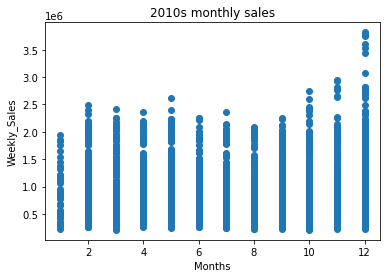

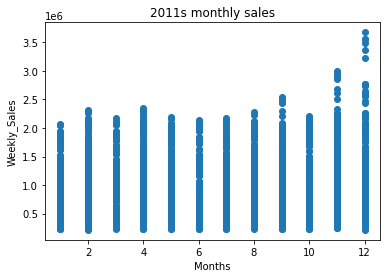

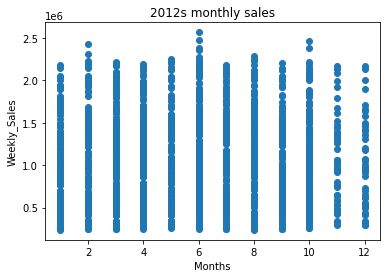

In [26]:
#Monthly view of sales each year
plt.scatter(df[df.Year == 2010]['Month'], df[df.Year == 2010]['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly_Sales')
plt.title('2010s monthly sales')
plt.show()

plt.scatter(df[df.Year == 2011]['Month'], df[df.Year == 2011]['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly_Sales')
plt.title('2011s monthly sales')
plt.show()

plt.scatter(df[df.Year == 2012]['Month'], df[df.Year == 2012]['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly_Sales')
plt.title('2012s monthly sales')
plt.show()



Text(0.5, 1.0, 'Monthly view of sales')

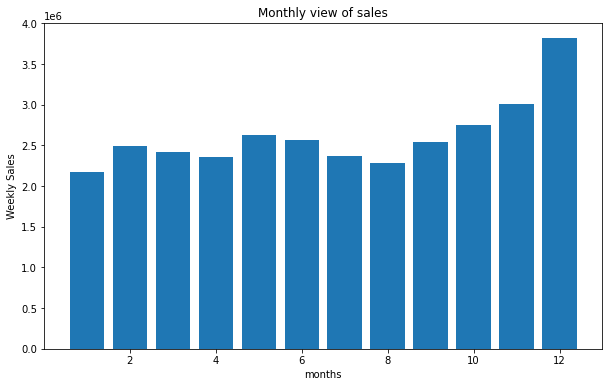

In [29]:
# Monthly view of sales for all years
plt.figure(figsize=(10,6))
plt.bar(df["Month"],df["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")

# Statistical model

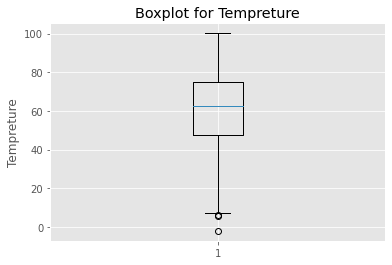

In [34]:
#Checking for outliers
#Boxplot for Temperature.
#Look for outliers
style.use('ggplot')
plt.boxplot(df['Temperature'])

#plt.axis([0,1000,0,1000])
plt.title('Boxplot for Tempreture')
plt.ylabel('Tempreture')


plt.show()

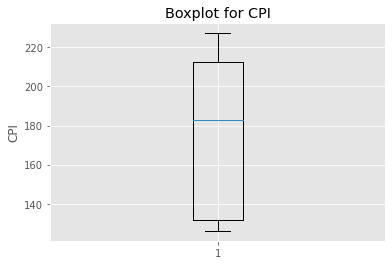

In [35]:
#Checking for outliers
#Boxplot for CPI.
#Look for outliers
style.use('ggplot')
plt.boxplot(df['CPI'])

#plt.axis([0,1000,0,1000])
plt.title('Boxplot for CPI')
plt.ylabel('CPI')


plt.show()

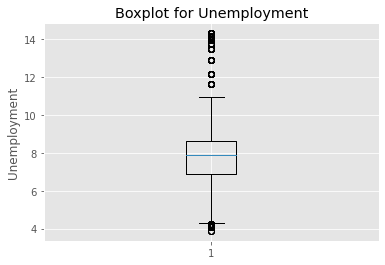

In [36]:
#Checking for outliers
#Boxplot for Unemployment.
#Look for outliers
style.use('ggplot')
plt.boxplot(df['Unemployment'])

#plt.axis([0,1000,0,1000])
plt.title('Boxplot for Unemployment')
plt.ylabel('Unemployment')


plt.show()

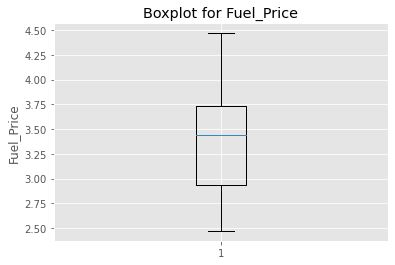

In [37]:
#Checking for outliers
#Boxplot for Fuel_Price.
#Look for outliers
style.use('ggplot')
plt.boxplot(df['Fuel_Price'])

#plt.axis([0,1000,0,1000])
plt.title('Boxplot for Fuel_Price')
plt.ylabel('Fuel_Price')


plt.show()

Unemployment and temperature columns have some outliers 

In [41]:
#Drop the outlier
df1 = df[(df['Unemployment'] < 10) & (df['Unemployment'] > 4.5) & (df['Temperature'] > 10)]

In [42]:
df1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3


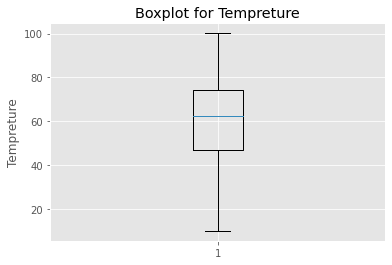

In [43]:
#Check outliers

#Look for outliers
style.use('ggplot')
plt.boxplot(df1['Temperature'])

#plt.axis([0,1000,0,1000])
plt.title('Boxplot for Tempreture')
plt.ylabel('Tempreture')


plt.show()

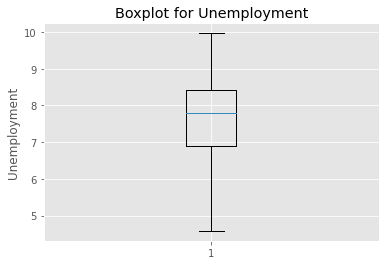

In [45]:
#Look for outliers
style.use('ggplot')
plt.boxplot(df1['Unemployment'])

#plt.axis([0,1000,0,1000])
plt.title('Boxplot for Unemployment')
plt.ylabel('Unemployment')


plt.show()

(0.0, 3999121.46)

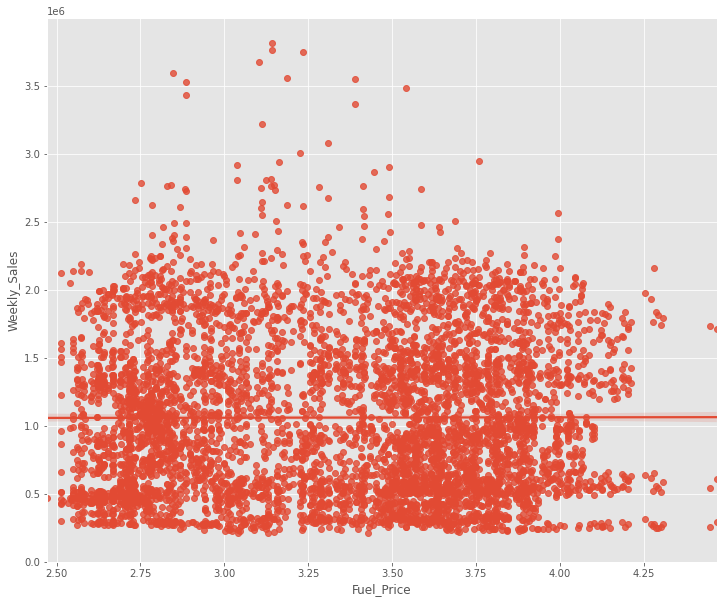

In [50]:
#Check uneployment, CPI, fuel price have any impact on sales

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x=df1["Fuel_Price"], y=df1["Weekly_Sales"], data=df1)
plt.ylim(0,)

(0.0, 3999121.46)

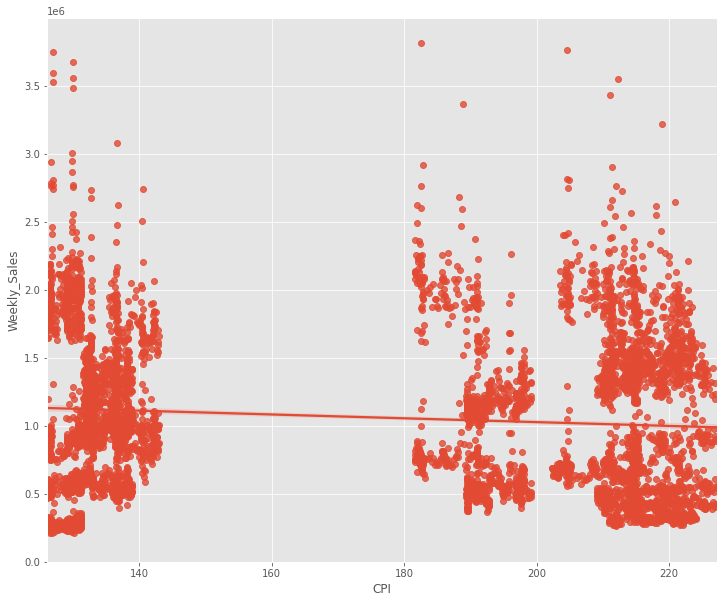

In [51]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x=df1["CPI"], y=df1["Weekly_Sales"], data=df1)
plt.ylim(0,)

(0.0, 3999121.46)

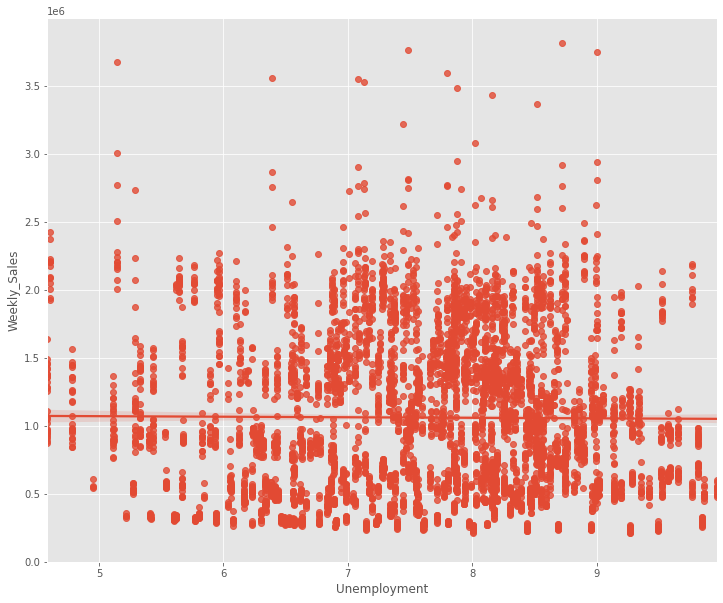

In [52]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x=df1["Unemployment"], y=df1["Weekly_Sales"], data=df1)
plt.ylim(0,)

In [58]:
df[['Unemployment', 'Weekly_Sales']].corr()

,Unemployment,Weekly_Sales
Unemployment,1.000000,-0.106176
Weekly_Sales,-0.106176,1.000000


In [59]:
df[['CPI', 'Weekly_Sales']].corr()

,CPI,Weekly_Sales
CPI,1.000000,-0.072634
Weekly_Sales,-0.072634,1.000000


In [60]:
df[['Fuel_Price', 'Weekly_Sales']].corr()

,Fuel_Price,Weekly_Sales
Fuel_Price,1.000000,0.009464
Weekly_Sales,0.009464,1.000000


In [61]:
Pearson_coef_atemp, p_value = stats.pearsonr(df1['Fuel_Price'], df1['Weekly_Sales'])
Pearson_coef_atemp, p_value

(0.002245013726811698, 0.8659286994961168)

In [62]:
Pearson_coef_atemp, p_value = stats.pearsonr(df1['CPI'], df1['Weekly_Sales'])
Pearson_coef_atemp, p_value

(-0.09470520302838346, 9.458234724308377e-13)

In [63]:
Pearson_coef_atemp, p_value = stats.pearsonr(df1['Unemployment'], df1['Weekly_Sales'])
Pearson_coef_atemp, p_value

(-0.0075555810287918496, 0.5698917625747358)

# Model Building 

# Linear Regression

In [64]:
df1.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day'],
      dtype='object')

In [76]:
X = df1[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day']]
Y = df1['Weekly_Sales']

In [77]:
#Spilit the data into training and testing set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [80]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [82]:
y_pred

array([1147376.27453426, 1272144.52885817, 1265182.31070974, ...,
       1149794.33385673, 1096362.5248131 , 1083192.99057537])

In [91]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 459251.3575010129
Mean Squared Error: 311931455281.71655


In [94]:
print('Accuracy:',reg.score(x_test, y_test)*100)

Accuracy: 12.487583438979266


# Random forest 

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
rfr = RandomForestRegressor()        
rfr.fit(x_train, y_train)
y_pred=rfr.predict(x_test)
print('Accuracy:',rfr.score(x_test, y_test)*100)

Accuracy: 93.57796328053118


In [97]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 72668.43775712604
Mean Squared Error: 22890868958.917522


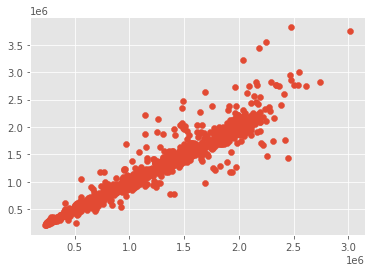

In [99]:
plt.scatter(y_pred, y_test)